In [79]:
import torch
import model
import tqdm
from train import train_test_split, make_batch
from matplotlib import pyplot as plt

In [84]:
dataset = torch.load("data/dataset.pt")
train_x, train_y, test_x, test_y = train_test_split(*dataset, test_size=0.05)

m = model.Model()
lossi = []
test_lossi = []
progress_bar = tqdm.tqdm(range(10_000))
for i in progress_bar:
    x, y = make_batch(train_x, train_y, 1000)
    loss = m.train(x, y)
    with torch.no_grad():
        _, test_loss = m.forward(test_x, test_y)
    if i % 100 == 0:
        progress_bar.set_postfix(loss=loss)
    lossi.append(loss)
    test_lossi.append(test_loss)

100%|██████████| 10000/10000 [01:02<00:00, 159.48it/s, loss=0.386]


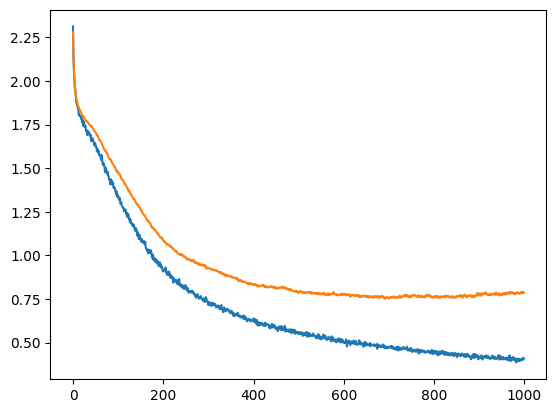

In [86]:

plt.plot(torch.tensor(lossi).view(-1, 10).mean(dim=1))
plt.plot(torch.tensor(test_lossi).view(-1, 10).mean(dim=1))
plt.show()
